In [1]:
words = open('names_es_ar.txt').read().splitlines()

In [2]:
chars = sorted(list(set("".join(words))))
n = len(chars)
stoi = {s: i + 1 for i, s in enumerate(chars)}
stoi["."] = 0
itos = {i: s for s, i in stoi.items()}

In [3]:

itos

{1: ' ',
 2: "'",
 3: 'A',
 4: 'B',
 5: 'C',
 6: 'D',
 7: 'E',
 8: 'F',
 9: 'G',
 10: 'H',
 11: 'I',
 12: 'J',
 13: 'K',
 14: 'L',
 15: 'M',
 16: 'N',
 17: 'O',
 18: 'P',
 19: 'Q',
 20: 'R',
 21: 'S',
 22: 'T',
 23: 'U',
 24: 'V',
 25: 'W',
 26: 'X',
 27: 'Y',
 28: 'Z',
 29: '_',
 30: '`',
 31: 'a',
 32: 'b',
 33: 'c',
 34: 'd',
 35: 'e',
 36: 'f',
 37: 'g',
 38: 'h',
 39: 'i',
 40: 'j',
 41: 'k',
 42: 'l',
 43: 'm',
 44: 'n',
 45: 'o',
 46: 'p',
 47: 'q',
 48: 'r',
 49: 's',
 50: 't',
 51: 'u',
 52: 'v',
 53: 'w',
 54: 'x',
 55: 'y',
 56: 'z',
 57: '|',
 58: '´',
 59: 'Á',
 60: 'Å',
 61: 'Ç',
 62: 'É',
 63: 'Í',
 64: 'Ï',
 65: 'Ñ',
 66: 'Ó',
 67: 'Ù',
 68: 'Ú',
 69: 'á',
 70: 'ã',
 71: 'ä',
 72: 'ç',
 73: 'é',
 74: 'ê',
 75: 'ë',
 76: 'í',
 77: 'î',
 78: 'ï',
 79: 'ñ',
 80: 'ó',
 81: 'õ',
 82: 'ö',
 83: 'ù',
 84: 'ú',
 85: 'û',
 86: 'ü',
 87: 'Ŷ',
 88: 'ϋ',
 0: '.'}

In [4]:
import torch
import torch.nn.functional as F

In [5]:
N = torch.zeros((n + 1, n + 1), dtype=torch.int32)

for w in words[:]:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

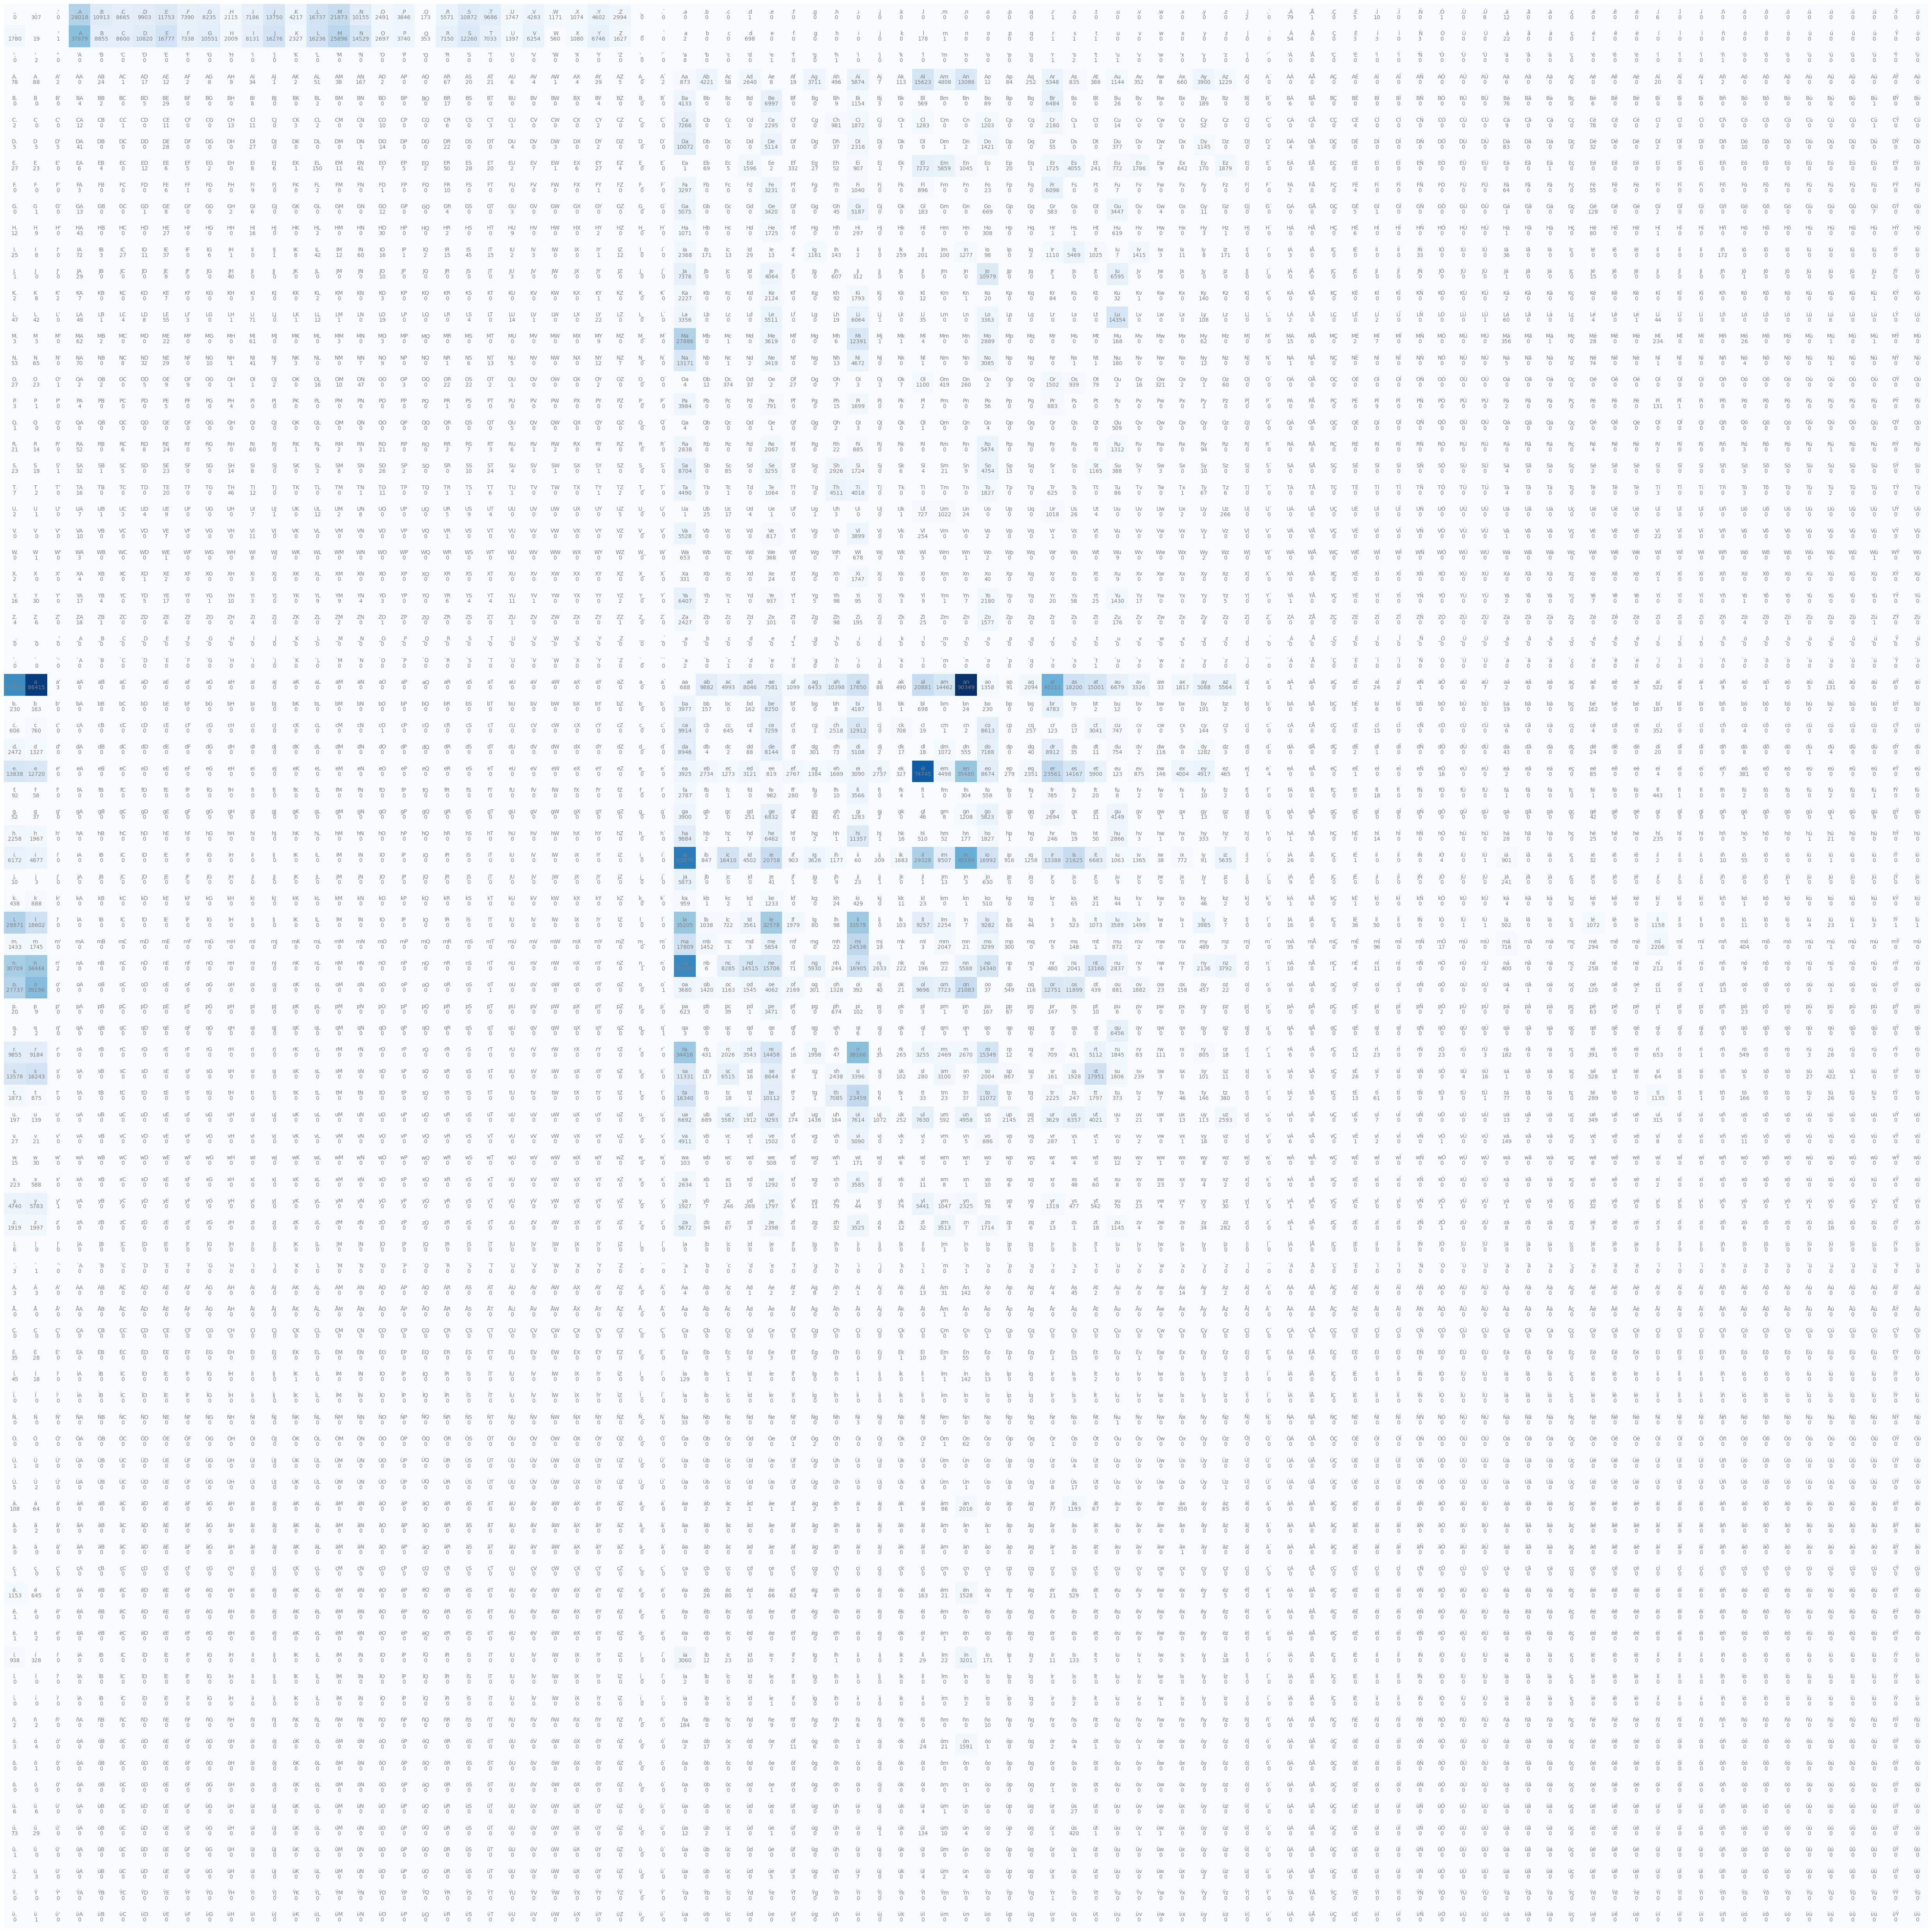

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(64,64))
plt.imshow(N, cmap='Blues')
for i in range(n+1):
    for j in range(n+1):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i,j].item(), ha="center", va="top", color="gray")
plt.axis('off')
plt.show()

In [7]:
N[0, :].shape

torch.Size([89])

In [8]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000e+00, 1.4629e-03, 0.0000e+00, 1.3351e-01, 5.2003e-02, 4.1291e-02,
        4.7190e-02, 5.6006e-02, 3.5215e-02, 3.9242e-02, 1.0078e-02, 3.4243e-02,
        6.5522e-02, 2.0095e-02, 7.9756e-02, 1.0423e-01, 4.8391e-02, 1.1870e-02,
        1.8327e-02, 8.2439e-04, 2.6547e-02, 5.1808e-02, 4.6156e-02, 8.3249e-03,
        2.0410e-02, 5.5801e-03, 5.1179e-03, 2.1930e-02, 1.4267e-02, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.7652e-06, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        4.7652e-06, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 9.5305e-06, 0.0000e+00, 3.7645e-04,
        4.7652e-06, 0.0000e+00, 2.3826e-05, 4.7652e-05, 0.0000e+00, 0.0000e+00,
        4.7652e-06, 0.0000e+00, 3.8122e-05, 5.7183e-05, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+

In [9]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
ix
itos[ix]

'A'

In [10]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [11]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [60]:
ix = 0

for i in range(10):
    while True:
        p = N[ix].float()
        p = p / p.sum()
        # p = torch.ones(89) / 89.0
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        if ix == 0:
            break
        print(itos[ix], end="")
    print()


Guelmia Irario Maea Igo Azelimi
Elonala
Beridicowé
Nond Ca Gatio
An Cer
Kermaquíariz Luíae Manaraneldriciaigam
Iris
Aquena Aga
Br Pa Janireldo Sazassha Salie
Nirt
